In [15]:
# Gurobi for optimization
from gurobipy import GRB, Model, quicksum
import gurobipy as gp

# Pandas for data manipulation
import pandas as pd

# Numpy for numerical operations
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Datetime for handling time-related data
import datetime

# Pickle for saving/loading objects (optional, based on need)
import pickle


In [16]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(46)


# Define basic parameters for new flights
num_original_flights = 50
num_new_flights = 50
total_flights = num_original_flights + num_new_flights

# Helper function to generate random times within a certain range
def generate_random_time(start_hour, end_hour):
    """Generate a random time string between start_hour and end_hour."""
    hour = np.random.randint(start_hour, end_hour)
    minute = np.random.choice([0, 15, 30, 45])
    return f"{hour:02d}:{minute:02d}"

# Generate flight IDs for 100 flights
flight_ids = [f"F{i:02d}" for i in range(1, total_flights + 1)]

arrival_times = [
        '09:00', '08:30', '09:00', '08:30', '08:15', '07:30', '10:15', '10:00', '10:25', '10:40',
        '11:00', '11:00', '11:15', '11:30', '11:30', '12:00', '11:45', '11:50', '11:55', '12:10',
        '12:45', '12:05', '12:10', '12:20', '12:20', '12:20', '12:30', '12:25', '12:40', '12:55',
        '12:50', '12:00', '13:00', '13:10', '14:25', '14:30', '14:00', '14:55', '15:00', '19:55',
        '18:30', '19:30', '18:55', '21:00', '20:10', '20:00', '22:30', '21:25', '21:30', '22:15'
    ]
departure_times = [
        '09:50', '09:10', '09:50', '10:20', '09:00', '08:50', '11:20', '10:50', '11:55', '11:35',
        '12:35', '12:25', '12:15', '12:20', '12:40', '13:55', '13:40', '12:45', '12:55', '14:00',
        '14:30', '13:00', '13:30', '13:20', '13:40', '13:30', '14:10', '14:10', '14:40', '13:40',
        '14:30', '12:55', '14:25', '14:45', '16:10', '15:20', '15:20', '16:00', '15:50', '21:25',
        '19:25', '20:50', '19:55', '22:55', '22:00', '21:15', '23:25', '23:15', '22:45', '23:10'
    ]
passenger_numbers = [
        140, 138, 340, 293, 252, 105, 130, 166, 191, 178,
        293, 166, 255, 183, 176, 220, 173, 145, 118, 153,
        256, 104, 269, 140, 142, 129, 190, 142, 163, 185,
        258, 133, 156, 120, 193, 300, 104, 219, 239, 111,
        166, 242, 167, 278, 195, 144, 219, 253, 158, 276
    ]
flight_types = [
        'Domestic', 'Domestic', 'International', 'International', 'International',
        'Domestic', 'Domestic', 'Domestic', 'International', 'Domestic',
        'International', 'Domestic', 'International', 'International', 'Domestic',
        'International', 'Domestic', 'Domestic', 'Domestic', 'Domestic',
        'International', 'Domestic', 'International', 'Domestic', 'Domestic',
        'Domestic', 'International', 'Domestic', 'Domestic', 'International',
        'International', 'Domestic', 'Domestic', 'Domestic', 'International',
        'International', 'Domestic', 'International', 'International', 'Domestic',
        'Domestic', 'International', 'Domestic', 'International', 'International',
        'Domestic', 'International', 'International', 'Domestic', 'International'
    ]

# Generate additional data for new flights
new_types = np.random.choice(['Domestic', 'International'], num_new_flights)
new_passengers = np.random.randint(100, 350, num_new_flights)
new_arrival_times = [generate_random_time(8, 22) for _ in range(num_new_flights)]
new_departure_times = [generate_random_time(8, 22) for _ in range(num_new_flights)]

# Combine existing and new flight data
flight_types = np.concatenate((flight_types, new_types))
passenger_numbers = np.concatenate((passenger_numbers, new_passengers))
arrival_times = np.concatenate((arrival_times, new_arrival_times))
departure_times = np.concatenate((departure_times, new_departure_times))


flight_data = pd.DataFrame({
    'flight_id': flight_ids,
    'arrival_time': arrival_times,
    'departure_time': departure_times,
    'passenger_number': passenger_numbers,
    'flight_type': flight_types
})


# Convert times to minutes since midnight for consistency with previous code
def time_to_minutes(t):
    h, m = map(int, t.split(':'))
    return h * 60 + m

arrival_times = [time_to_minutes(t) for t in arrival_times]
departure_times = [time_to_minutes(t) for t in departure_times]

flight_data = pd.DataFrame({
    'flight_id': flight_ids,
    'arrival_time': arrival_times,
    'departure_time': departure_times,
    'passenger_number': passenger_numbers,
    'flight_type': flight_types
})

# Gate IDs
gate_ids = [f"Gate {i}" for i in range(1, 26)]
gate_types = ['Domestic' if i in [1, 2, 5, 7, 8, 10, 12, 13, 15, 16, 19, 22, 23, 25] else 'International' for i in range(1, 26)]

gate_data = pd.DataFrame({
    'gate_id': gate_ids,
    'gate_type': gate_types
})

# Manually entered distances from the provided matrix
distances = [
    [0, 2, 4, 6, 8, 8, 6, 6, 8, 10, 10, 8, 10, 12, 12, 18, 20, 22, 20, 18, 18, 20, 22, 20, 18],
    [2, 0, 2, 4, 6, 6, 4, 4, 6, 8, 8, 6, 8, 10, 10, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [4, 2, 0, 2, 4, 4, 2, 2, 4, 6, 6, 4, 6, 8, 8, 14, 16, 18, 16, 14, 14, 16, 18, 16, 14],
    [6, 4, 2, 0, 2, 2, 0, 2, 4, 6, 6, 4, 6, 8, 8, 14, 16, 18, 16, 14, 14, 16, 18, 16, 14],
    [8, 6, 4, 2, 0, 0, 2, 4, 6, 8, 8, 6, 8, 10, 10, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [8, 6, 4, 2, 0, 0, 2, 4, 6, 8, 8, 6, 8, 10, 10, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [6, 4, 2, 0, 2, 2, 0, 2, 4, 6, 6, 4, 6, 8, 8, 14, 16, 18, 16, 14, 14, 16, 18, 16, 14],
    [6, 4, 2, 2, 4, 4, 2, 0, 2, 4, 4, 2, 4, 6, 6, 12, 14, 16, 14, 12, 12, 14, 16, 14, 12],
    [8, 6, 4, 4, 6, 6, 4, 2, 0, 2, 2, 0, 2, 4, 4, 14, 16, 18, 16, 14, 14, 16, 18, 16, 14],
    [10, 8, 6, 6, 8, 8, 6, 4, 2, 0, 0, 2, 4, 6, 6, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [10, 8, 6, 6, 8, 8, 6, 4, 2, 0, 0, 2, 4, 6, 6, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [8, 6, 4, 4, 6, 6, 4, 2, 0, 2, 2, 0, 2, 4, 4, 14, 16, 18, 16, 14, 14, 16, 18, 16, 14],
    [10, 8, 6, 6, 8, 8, 6, 4, 2, 4, 4, 2, 0, 2, 2, 16, 18, 20, 18, 16, 16, 18, 20, 18, 16],
    [12, 10, 8, 8, 10, 10, 8, 6, 4, 6, 6, 4, 2, 0, 2, 18, 20, 22, 20, 18, 18, 20, 22, 20, 18],
    [12, 10, 8, 8, 10, 10, 8, 6, 4, 6, 6, 4, 2, 2, 0, 18, 20, 22, 20, 18, 18, 20, 22, 20, 18],
    [18, 16, 14, 14, 16, 16, 14, 12, 14, 16, 16, 14, 16, 18, 18, 0, 2, 4, 2, 0, 0, 2, 4, 2, 0],
    [20, 18, 16, 16, 18, 18, 16, 14, 16, 18, 18, 16, 18, 20, 20, 2, 0, 2, 0, 2, 2, 4, 6, 4, 2],
    [22, 20, 18, 18, 20, 20, 18, 16, 18, 20, 20, 18, 20, 22, 22, 4, 2, 0, 2, 4, 4, 6, 8, 6, 4],
    [20, 18, 16, 16, 18, 18, 16, 14, 16, 18, 18, 16, 18, 20, 20, 2, 0, 2, 0, 2, 2, 4, 6, 4, 2],
    [18, 16, 14, 14, 16, 16, 14, 12, 14, 16, 16, 14, 16, 18, 18, 0, 2, 4, 2, 0, 0, 2, 4, 2, 0],
    [18, 16, 14, 14, 16, 16, 14, 12, 14, 16, 16, 14, 16, 18, 18, 0, 2, 4, 2, 0, 0, 2, 4, 2, 0],
    [20, 18, 16, 16, 18, 18, 16, 14, 16, 18, 18, 16, 18, 20, 20, 2, 4, 6, 4, 2, 2, 0, 2, 0, 2],
    [22, 20, 18, 18, 20, 20, 18, 16, 18, 20, 20, 18, 20, 22, 22, 4, 6, 8, 6, 4, 4, 2, 0, 2, 4],
    [20, 18, 16, 16, 18, 18, 16, 14, 16, 18, 18, 16, 18, 20, 20, 2, 4, 6, 4, 2, 2, 0, 2, 0, 2],
    [18, 16, 14, 14, 16, 16, 14, 12, 14, 16, 16, 14, 16, 18, 18, 0, 2, 4, 2, 0, 0, 2, 4, 2, 0]
]

# Convert distances array to DataFrame for better readability
distance_df = pd.DataFrame(distances, index=gate_ids, columns=gate_ids)


# Distances to the exit
ed_k = [3 if i in [1, 2, 3, 8, 13, 14, 15] else 5 if i in [4, 7, 9, 12] else 7 if i in [5, 6, 10, 11] else 14 for i in range(1, 26)]

# Store number of flights and gates
num_flights = len(flight_data)
num_gates = len(gate_data)

# Generate transiting passengers data (p_ij) with constraints
p_ij = np.zeros((num_flights, num_flights), dtype=int)

for i in range(num_flights):
    max_transit_passengers = passenger_numbers[i] // 2  # Maximum of 50% of the total passengers
    remaining_passengers = max_transit_passengers
    transfer_flights = np.random.choice([x for x in range(num_flights) if x != i], 2, replace=False)  # Choose 2 different flights
    for j in transfer_flights:
        if remaining_passengers > 0:
            p_ij[i, j] = np.random.randint(0, min(50, remaining_passengers + 1))
            remaining_passengers -= p_ij[i, j]

# Verify generated data
print("Flight Data:")
print(flight_data.head(num_flights))

print("\nGate Data:")
print(gate_data.head(num_gates))

print("\nDistance Matrix (d_kl):")
print(distance_df)

print("\nDistance to Entrance/Exit (ed_k):")
print(pd.Series(ed_k, index=gate_ids))

print("\nTransiting Passengers (p_ij):")
print(pd.DataFrame(p_ij, index=flight_ids, columns=flight_ids).head(num_flights))


Flight Data:
   flight_id  arrival_time  departure_time  passenger_number    flight_type
0        F01           540             590               140       Domestic
1        F02           510             550               138       Domestic
2        F03           540             590               340  International
3        F04           510             620               293  International
4        F05           495             540               252  International
..       ...           ...             ...               ...            ...
95       F96           495             615               166       Domestic
96       F97           645            1230               329  International
97       F98           915             495               253  International
98       F99           570            1275               292  International
99      F100           900            1155               153  International

[100 rows x 5 columns]

Gate Data:
    gate_id      gate_type
0    Gate 1 

### Model Explanation

The objective of the FC formulation is to minimize the total walking distance of passengers at the airport, considering both transfer passengers and non-transfer passengers. The model includes the following key components:

- **Parameters**:
  - `num_flights`: Number of flights
  - `num_gates`: Number of gates
  - `arrival_times`: Arrival times of flights
  - `departure_times`: Departure times of flights
  - `passenger_numbers`: Number of passengers per flight
  - `flight_types`: Type of flight (domestic/international)
  - `gate_types`: Type of gate (domestic/international)
  - `distances`: Distance matrix between gates

- **Decision Variables**:
  - `x[i, k]`: Binary variable, 1 if flight \(i\) is assigned to gate \(k\), 0 otherwise
  - `w[i, k, l]`: Continuous variable representing the number of passengers from flight \(i\) through gate \(k\) to gate \(l\)

- **Objective Function**:
  - Minimize the total walking distance of passengers.

- **Constraints**:
  - Each flight must be assigned to exactly one gate.
  - Gates cannot be double-booked.
  - Flow balance constraints for transfer passengers.


In [17]:
# Initialize the Gurobi model
model = Model("FC_Formulation")

# Distance penalty for the apron
apron_distance_penalty = 30

# Distance matrices
d_kl = np.zeros((num_gates + 1, num_gates + 1))
d_kl[:num_gates, :num_gates] = distance_df.values
d_kl[num_gates, :] = apron_distance_penalty  # Distance from apron to all gates
d_kl[:, num_gates] = apron_distance_penalty  # Distance from all gates to apron
d_kl[num_gates, num_gates] = apron_distance_penalty  # Distance from apron to itself

# Distance to/from exit for each gate (including apron)
ed_k = np.append(ed_k, apron_distance_penalty)  # Append apron distance to exit

print(d_kl,ed_k)
# Passengers data
e_i = flight_data['passenger_number'].values - np.sum(p_ij, axis=1)
f_i = flight_data['passenger_number'].values - np.sum(p_ij, axis=0)

# Aircraft type (domestic/international)
g_i = flight_data['flight_type'].apply(lambda x: 'D' if x == 'Domestic' else 'I').values

# Sets of domestic and international gates
K_D = [k for k, t in zip(range(num_gates), gate_types) if t == 'Domestic']
K_I = [k for k, t in zip(range(num_gates), gate_types) if t == 'International']
K_D.append(num_gates)  # Add apron to domestic gates
K_I.append(num_gates)  # Add apron to international gates

# Number of gates
m = num_gates

# Generating overlap sets for all time steps
def generate_overlap_sets(flight_data):
    # Initialize dictionaries to hold overlap sets
    I_Dt = []
    I_It = []
    T_D = {}
    T_I = {}
    
    # Iterate through each minute of the day
    for t in range(1440):
        domestic_overlaps = set()
        international_overlaps = set()
        
        # Check for overlapping flights at time t
        for i, flight in flight_data.iterrows():
            if flight['arrival_time'] <= t < flight['departure_time']:
                if flight['flight_type'] == 'Domestic':
                    domestic_overlaps.add(flight['flight_id'])
                else:
                    international_overlaps.add(flight['flight_id'])
        
        if domestic_overlaps:
            I_Dt.append(domestic_overlaps)
        if international_overlaps:
            I_It.append(international_overlaps)
    
    # Convert I_Dt and I_It to T_D and T_I
    for idx, overlap_set in enumerate(I_Dt):
        if overlap_set:
            T_D[f"TD{idx+1}"] = overlap_set
            
    for idx, overlap_set in enumerate(I_It):
        if overlap_set:
            T_I[f"TI{idx+1}"] = overlap_set
    
    return T_D, T_I

# Generate overlap sets
T_D, T_I = generate_overlap_sets(flight_data)

# Print overlap sets
print("Overlap Sets for Domestic Flights (T_D):")
for key, value in T_D.items():
    print(f"{key}: {value}")

print("\nOverlap Sets for International Flights (T_I):")
for key, value in T_I.items():
    print(f"{key}: {value}")

# Calculate N_A_star
def calculate_N_A_star(T_D, T_I, K_D, K_I):
    N_A_star = 0
    for overlap_set in T_D.values():
        if len(overlap_set) > len(K_D):
            N_A_star += len(overlap_set) - len(K_D) + 1
            print(f"Domestic Overlap Set: {overlap_set}, Excess: {len(overlap_set) - len(K_D)+1}")
    for overlap_set in T_I.values():
        if len(overlap_set) > len(K_I):
            N_A_star += len(overlap_set) - len(K_I) + 1
            print(f"International Overlap Set: {overlap_set}, Excess: {len(overlap_set) - len(K_I)+1}")
    return N_A_star

N_A_star = calculate_N_A_star(T_D, T_I, K_D, K_I)
print("\nN_A_star:", N_A_star)

# Define function to calculate NA*
def calculate_NA_star(flight_data, num_gates):
    # Create a list to hold the number of aircraft at each minute
    time_slots = [0] * 1440  # There are 1440 minutes in a day

    # Populate the list with the number of overlapping aircraft at each minute
    for index, flight in flight_data.iterrows():
        for t in range(flight['arrival_time'], flight['departure_time']):
            time_slots[t] += 1
    
    # Calculate the maximum number of aircraft exceeding the available gates
    max_excess_aircraft = max([max(0, count - num_gates) for count in time_slots])
    
    return max_excess_aircraft

NA_star = calculate_NA_star(flight_data, num_gates)
print("NA*:", NA_star)

# Decision Variables
x = model.addVars(num_flights, num_gates + 1, vtype=GRB.BINARY, name="x")
w = model.addVars(num_flights, num_gates + 1, num_gates + 1, vtype=GRB.CONTINUOUS, name="w")

# Verify variables
print("Decision variables defined.")


[[ 0.  2.  4.  6.  8.  8.  6.  6.  8. 10. 10.  8. 10. 12. 12. 18. 20. 22.
  20. 18. 18. 20. 22. 20. 18. 30.]
 [ 2.  0.  2.  4.  6.  6.  4.  4.  6.  8.  8.  6.  8. 10. 10. 16. 18. 20.
  18. 16. 16. 18. 20. 18. 16. 30.]
 [ 4.  2.  0.  2.  4.  4.  2.  2.  4.  6.  6.  4.  6.  8.  8. 14. 16. 18.
  16. 14. 14. 16. 18. 16. 14. 30.]
 [ 6.  4.  2.  0.  2.  2.  0.  2.  4.  6.  6.  4.  6.  8.  8. 14. 16. 18.
  16. 14. 14. 16. 18. 16. 14. 30.]
 [ 8.  6.  4.  2.  0.  0.  2.  4.  6.  8.  8.  6.  8. 10. 10. 16. 18. 20.
  18. 16. 16. 18. 20. 18. 16. 30.]
 [ 8.  6.  4.  2.  0.  0.  2.  4.  6.  8.  8.  6.  8. 10. 10. 16. 18. 20.
  18. 16. 16. 18. 20. 18. 16. 30.]
 [ 6.  4.  2.  0.  2.  2.  0.  2.  4.  6.  6.  4.  6.  8.  8. 14. 16. 18.
  16. 14. 14. 16. 18. 16. 14. 30.]
 [ 6.  4.  2.  2.  4.  4.  2.  0.  2.  4.  4.  2.  4.  6.  6. 12. 14. 16.
  14. 12. 12. 14. 16. 14. 12. 30.]
 [ 8.  6.  4.  4.  6.  6.  4.  2.  0.  2.  2.  0.  2.  4.  4. 14. 16. 18.
  16. 14. 14. 16. 18. 16. 14. 30.]
 [10.  8.  6.  6.  

In [18]:
# Objective function components\n",
objective = quicksum(d_kl[k, l] * w[i, k, l] for i in range(num_flights) for k in range(num_gates + 1) for l in range(num_gates + 1)) + \
            quicksum((e_i[i] + f_i[i]) * ed_k[k] * x[i, k] for i in range(num_flights) for k in range(num_gates + 1))

model.setObjective(objective, GRB.MINIMIZE)

# Verify objective
print("Objective function defined.")

Objective function defined.


In [19]:
# Constraint 3: Assign each aircraft to exactly one gate
for i in range(num_flights):
    if g_i[i] == 'D':
        model.addConstr(quicksum(x[i, k] for k in K_D) == 1, name=f"Assign_Domestic_{i}")
    else:
        model.addConstr(quicksum(x[i, k] for k in K_I) == 1, name=f"Assign_International_{i}")

# Add Constraints (4) and (5): At most one aircraft can be assigned to a fixed gate during a certain time interval
# Constraint (4) for domestic flights (excluding apron)
for t, I_Dt in T_D.items():
    for k in K_D[:-1]:  # Exclude the apron
        model.addConstr(quicksum(x[flight_ids.index(flight), k] for flight in I_Dt) <= 1, name=f"MaxOneAircraft_Domestic_{t}_Gate{k}")

# Constraint (5) for international flights (excluding apron)
for t, I_It in T_I.items():
    for k in K_I[:-1]:  # Exclude the apron
        model.addConstr(quicksum(x[flight_ids.index(flight), k] for flight in I_It) <= 1, name=f"MaxOneAircraft_International_{t}_Gate{k}")

# # Constraint 6: Minimum apron assignments
# model.addConstr(quicksum(x[i, num_gates] for i in range(num_flights)) <= 5, name="min_apron_assignments")

# Constraint (10): Passenger flow balance constraints (outbound)
for i in range(num_flights):
    gate_set = K_D if g_i[i] == 'D' else K_I  # Select the appropriate gate set
    for k in gate_set:
        model.addConstr(
            quicksum(w[i, k, l] for l in range(num_gates + 1)) == x[i, k] * sum(p_ij[i, j] for j in range(num_flights)),
            name=f"FlowBalance_{i}_{k}"
        )

# Constraint 11: Passenger flow balance constraints (inbound)
for i in range(num_flights):
    gate_set = K_D if g_i[i] == 'D' else K_I  # Select the appropriate gate set
    for k in range(num_gates + 1):  # Iterate over all gates including the apron
        model.addConstr(
            quicksum(w[i, l, k] for l in gate_set) == 
            quicksum(p_ij[i, j] * x[j, k] for j in range(num_flights)),
            name=f"PassengerFlow_{i}_{k}"
        )

# Constraint 12: Non-negativity of flow variables
for i in range(num_flights):
    gate_set = K_D if g_i[i] == 'D' else K_I  # Select the appropriate gate set
    for k in gate_set:
        for l in range(num_gates + 1):  # Iterate over all gates including the apron
            model.addConstr(
                w[i, k, l] >= 0,
                name=f"NonNegativeFlow_{i}_{k}_{l}"
            )

# Constraint (13): Ensure that overlapping domestic aircraft are assigned to the apron
for t, I_Dt in T_D.items():
    if len(I_Dt) > len(K_D) - 1:  # K_D includes the apron, so len(K_D) - 1 is the number of fixed gates
        model.addConstr(
            quicksum(x[flight_ids.index(flight), num_gates] for flight in I_Dt) >= len(I_Dt) - (len(K_D) - 1),
            name=f"ApronAssignment_Domestic_{t}"
        )

# Constraint (14): Ensure that overlapping international aircraft are assigned to the apron
for t, I_It in T_I.items():
    if len(I_It) > len(K_I) - 1:  # K_I includes the apron, so len(K_I) - 1 is the number of fixed gates
        model.addConstr(
            quicksum(x[flight_ids.index(flight), num_gates] for flight in I_It) >= len(I_It) - (len(K_I) - 1),
            name=f"ApronAssignment_International_{t}"
        )

# Verify constraints
print("Constraints defined.")


Constraints defined.


In [20]:
# Optimize model
model.optimize()

# Print results
if model.status == GRB.OPTIMAL:
    # Print flight assignments to gates
    for i in range(num_flights):
        for k in range(num_gates + 1):
            if x[i, k].X > 0.5:  # Check if the flight is assigned to the gate
                gate = 'Apron' if k == num_gates else gate_ids[k]
                print(f"Flight {flight_data.loc[i, 'flight_id']} is assigned to {gate}")
    
    # Print the flow of passengers between gates and to the exit
    print("\nPassenger Flow Between Gates and to the Exit:")
    for i in range(num_flights):
        for k in range(num_gates + 1):
            gate_from = 'Apron' if k == num_gates else gate_ids[k]
            total_transfer_passengers = 0
            # Flow to other gates
            for l in range(num_gates + 1):
                if w[i, k, l].X > 0:  # Only print non-zero flows
                    gate_to = 'Apron' if l == num_gates else gate_ids[l]
                    print(f"Flow from Flight {flight_data.loc[i, 'flight_id']} at {gate_from} to {gate_to}: {w[i, k, l].X}")
                    total_transfer_passengers += w[i, k, l].X
            # Flow to exit
            if x[i, k].X > 0.5:
                passengers_to_exit = flight_data.loc[i, 'passenger_number'] - total_transfer_passengers
                if passengers_to_exit > 0:
                    print(f"Flow from Flight {flight_data.loc[i, 'flight_id']} at {gate_from} to Exit: {passengers_to_exit}")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 62722 rows, 70200 columns and 284699 nonzeros
Model fingerprint: 0x6850c47e
Variable types: 67600 continuous, 2600 integer (2600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [2e+00, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 58171 rows and 32163 columns
Presolve time: 0.40s
Presolved: 4551 rows, 38037 columns, 83472 nonzeros
Variable types: 35576 continuous, 2461 integer (2461 binary)
Found heuristic solution: objective 925054.00000
Found heuristic solution: objective 384545.00000

Root relaxation: objective 2.344870e+05, 6352 iterations, 1.27 seconds (1.37 work units)

    Nodes    |    Current Node    |     Objective Bounds      |  

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\lars0\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\lars0\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 37432 rows, 35100 columns and 105198 nonzeros
Model fingerprint: 0xc6d44d4e
Variable types: 33800 continuous, 1300 integer (1300 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e+00, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolved: 2313 rows, 18882 columns, 40577 nonzeros

Continuing optimization...


Cutting planes:
  Gomory: 2
  Implied bound: 90
  MIR: 72
  Flow cover: 269
  Inf proof: 2
  RLT: 1
  Relax-and-lift: 22

Explored 729 nodes (165269 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 12 (of 12 available processors)

Solution count 10: 63691 63711 64131 ... 426576

Optimal solution found (tolerance 1.00e-04)
Best o

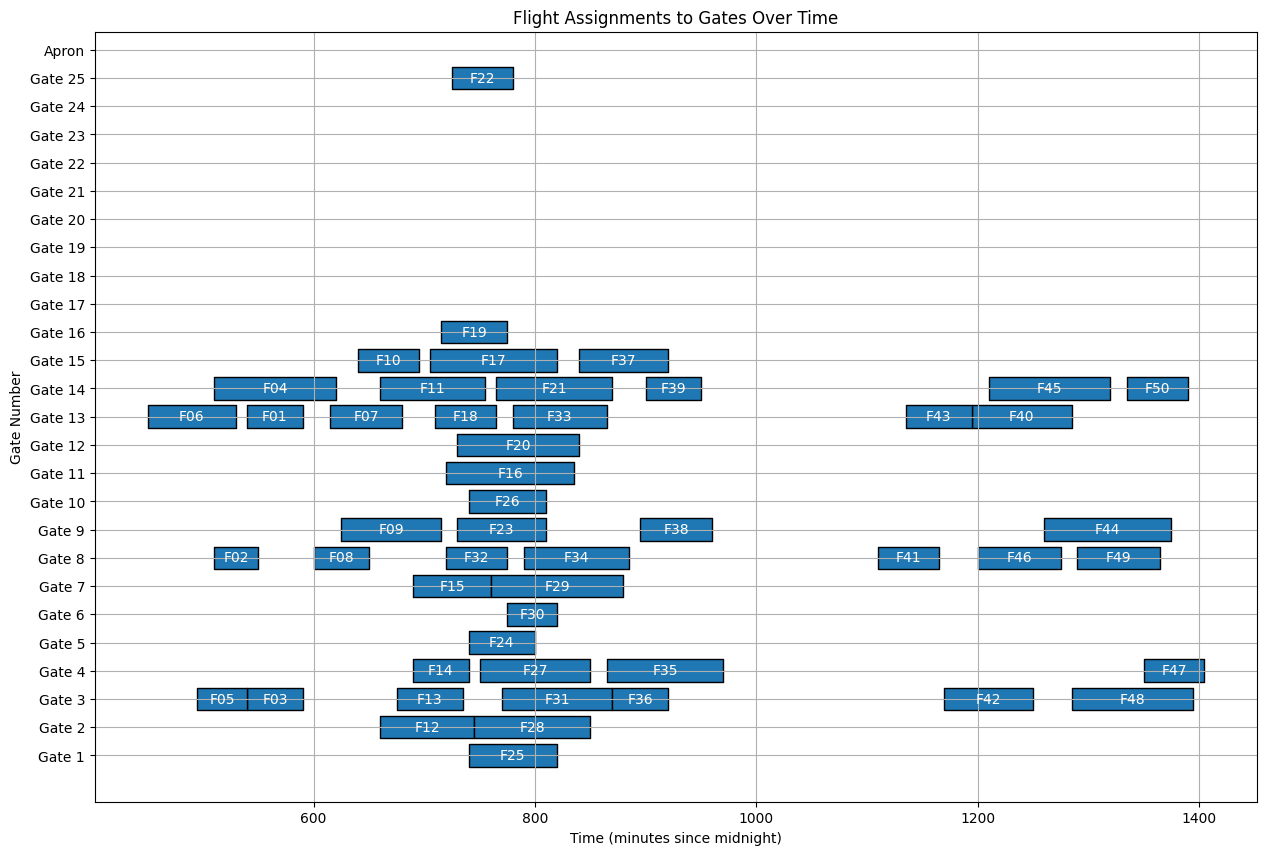

In [ ]:
# Optimize model
model.optimize()

# Create a dictionary to store flight assignments
flight_assignments = {}

# Collect flight assignments to gates
if model.status == GRB.OPTIMAL:
    for i in range(num_flights):
        for k in range(num_gates + 1):
            if x[i, k].X > 0.5:  # Check if the flight is assigned to the gate
                gate = 'Apron' if k == num_gates else gate_ids[k]
                flight_assignments[flight_data.loc[i, 'flight_id']] = {
                    'gate': gate,
                    'arrival_time': flight_data.loc[i, 'arrival_time'],
                    'departure_time': flight_data.loc[i, 'departure_time']
                }

    # Plot the flight assignments
    fig, ax = plt.subplots(figsize=(15, 10))

    for flight_id, info in flight_assignments.items():
        gate = info['gate']
        arrival_time = info['arrival_time']
        departure_time = info['departure_time']
        gate_num = gate_ids.index(gate) + 1 if gate != 'Apron' else num_gates + 1

        ax.broken_barh([(arrival_time, departure_time - arrival_time)], (gate_num - 0.4, 0.8),
                       facecolors=('tab:blue'), edgecolors=('black'))
        ax.text((arrival_time + departure_time) / 2, gate_num, flight_id,
                ha='center', va='center', color='white')

    # Set labels and title
    ax.set_xlabel('Time (minutes since midnight)')
    ax.set_ylabel('Gate Number')
    ax.set_title('Flight Assignments to Gates Over Time')
    ax.set_yticks(range(1, num_gates + 2))
    ax.set_yticklabels(gate_ids + ['Apron'])
    ax.grid(True)

    plt.show()
else:
    print("No optimal solution found.")
